In [ ]:
# WeatherPy

# Note

#  Instructions have been included for each segment. 
#  You do not have to follow them exactly, 
#        but they are included to help you think through the steps.

#  Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)  

# Generate Cities List
#      List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination using citipy
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [3]:
# Print the city count to confirm sufficient count
print (f"Number of Cities accumulated: {len(cities)}") 
cities

Number of Cities accumulated: 618


['mys shmidta',
 'jamestown',
 'port-cartier',
 'lamballe',
 'kodiak',
 'illoqqortoormiut',
 'east london',
 'soyo',
 'grand river south east',
 'kapaa',
 'chuy',
 'lavrentiya',
 'mataura',
 'avarua',
 'ushuaia',
 'busselton',
 'mar del plata',
 'nikolskoye',
 'hermanus',
 'fort myers beach',
 'qaanaaq',
 'sao filipe',
 'aklavik',
 'gorno-chuyskiy',
 'kamina',
 'bredasdorp',
 'mahebourg',
 'taolanaro',
 'cherskiy',
 'bilma',
 'terney',
 'saint-philippe',
 'vryburg',
 'marawi',
 'bengkulu',
 'geraldton',
 'tasiilaq',
 'saint anthony',
 'olinda',
 'bluff',
 'kyshtovka',
 'mgandu',
 'esso',
 'hilo',
 'comodoro rivadavia',
 'dashitou',
 'dombarovskiy',
 'rikitea',
 'thompson',
 'cape town',
 'tuktoyaktuk',
 'vaini',
 'seoul',
 'victoria',
 'ormara',
 'faanui',
 'jamame',
 'ilave',
 'albany',
 'kishi',
 'senanga',
 'isangel',
 'provideniya',
 'verkhoyansk',
 'georgetown',
 'ilulissat',
 'yellowknife',
 'punta arenas',
 'hambantota',
 'saskylakh',
 'kruisfontein',
 'bethel',
 'alice springs'

In [4]:
#  Perform API Calls
#      Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"                                      # alternative is "metric"

#      Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#      Set up lists to hold reponse info
CityName = []
CityID = []
Cloudiness = []
CountryCd = []
Date = []
Humidity = []
Lat = []
Lng = []
MaxTemp = []
WindSpeed = []

#       Perform a weather check on each city using a series of successive API calls.

# Loop through the list of cities and perform a request for data on each
# Model for weather:
#   Current weather object for Paris: 
#        {'coord': {'lon': 2.35, 'lat': 48.86}, 
#         'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 
#         'base': 'stations', 
#         'main': {'temp': 1.14, 'pressure': 1021, 'humidity': 80, 'temp_min': 1, 'temp_max': 2}, 
#         'visibility': 5000, 
#         'wind': {'speed': 3.6, 'deg': 20}, 
#         'clouds': {'all': 0}, 
#         'dt': 1519248600, 
#         'sys': {'type': 1, 'id': 5610, 'message': 0.0054, 'country': 'FR', 'sunrise': 1519195590, 'sunset': 1519233747}, 
#         'id': 2988507, 
#         'name': 'Paris', 
#         'cod': 200}.

for city in cities:
    response = requests.get(query_url + city).json()
#    pprint (response)  
    
    # Try to grab City info available in the Weather API
    try:
        CityName.append(response['name'])
        CityID.append(response['id'])
        Cloudiness.append(response['clouds']['all'])   
        CountryCd.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        MaxTemp.append(response['main']['temp_max'])
        WindSpeed.append(response['wind']['speed'])

        #       Include a print log of each city as it's being processed (with the city number and city name).
        print (f"City: {response['name']} and CityID: {response['id']}")
    
    # Handle exceptions for a City that is not available in the Weather API
    except:
        print (f"------City: {city} is not found in the Weather API - return code: {response['cod']}")
        pass



------City: mys shmidta is not found in the Weather API - return code: 404
City: Jamestown and CityID: 5122534
City: Port-Cartier and CityID: 6111696
City: Lamballe and CityID: 3008225
City: Saint Paul Harbor and CityID: 5866583
------City: illoqqortoormiut is not found in the Weather API - return code: 404
City: East London and CityID: 1006984
City: Soyo and CityID: 2236967
------City: grand river south east is not found in the Weather API - return code: 404
City: Kapaa and CityID: 5848280
City: Chui and CityID: 3443061
City: Lavrentiya and CityID: 4031637
City: Mataura and CityID: 6201424
City: Avarua and CityID: 4035715
City: Ushuaia and CityID: 3833367
City: Busselton and CityID: 2075265
City: Mar del Plata and CityID: 3430863
City: Nikolskoye and CityID: 546105
City: Hermanus and CityID: 3366880
City: Fort Myers Beach and CityID: 4155996
City: Qaanaaq and CityID: 3831208
City: São Filipe and CityID: 3374210
City: Aklavik and CityID: 5882953
------City: gorno-chuyskiy is not found 

City: Sergeevka and CityID: 1519385
City: Jishou and CityID: 1805270
City: Anadyr and CityID: 2127202
------City: coulihaut is not found in the Weather API - return code: 404
City: Huilong and CityID: 1806840
City: Podor and CityID: 2245170
City: Marinette and CityID: 5261852
City: Phonhong and CityID: 1655124
City: Naples and CityID: 3172394
City: Rawson and CityID: 3839307
City: Richards Bay and CityID: 962367
City: Öhringen and CityID: 2857565
City: Ponta do Sol and CityID: 2264557
------City: sorvag is not found in the Weather API - return code: 404
City: Laas and CityID: 3175096
City: Ningbo and CityID: 1799397
City: Aasiaat and CityID: 3424901
City: Guerrero Negro and CityID: 4021858
City: Banda Aceh and CityID: 1215502
City: Wajir and CityID: 178443
City: Luleå and CityID: 604490
City: Mawlaik and CityID: 1310120
City: Dikson and CityID: 1507390
City: Durban and CityID: 1007311
City: Severo-Kuril'sk and CityID: 2121385
City: Atar and CityID: 2381334
City: Khatanga and CityID: 20

City: Moose Factory and CityID: 6078372
City: Artyom and CityID: 587207
City: Tara and CityID: 1490140
City: Takoradze and CityID: 2294915
City: Kelvington and CityID: 5990669
City: Pyaozerskiy and CityID: 503581
City: Fort Morgan and CityID: 5577158
City: Raudeberg and CityID: 3146487
City: Mount Isa and CityID: 2065594
City: Lakes Entrance and CityID: 2160735
City: Léo and CityID: 2358382
City: Lanigan and CityID: 6049515
City: Vung Tau and CityID: 1562414
City: Baharly and CityID: 162158
City: Constantine and CityID: 2501152
City: Dingle and CityID: 1714733
City: Yar-Sale and CityID: 1486321
City: Port Macquarie and CityID: 2152659
City: Terra Santa and CityID: 3386467
City: São José da Coroa Grande and CityID: 3388456
City: Mehamn and CityID: 778707
City: La Plata and CityID: 3432043
City: Kikerino and CityID: 548763
City: Cheney and CityID: 5789856
City: Bonavista and CityID: 5905393
City: Broken Hill and CityID: 2173911
City: Asopós and CityID: 264481
City: Nanortalik and CityID:

In [7]:
#-----------------------------
#Data Retrieval Complete      
#-----------------------------
# Convert Raw Data to DataFrame
weather_dict = {
    "CityName": CityName,
    "CityID": CityID,
    "Cloudiness": Cloudiness,
    "CountryCd": CountryCd,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "MaxTemp": MaxTemp,
    "WindSpeed": WindSpeed
    }
# create a data frame from City,CityID,Cloudiness,CountryCd,Date,Humidity,lat,Lng,MaxTemp,WindSpeed
weather_data = pd.DataFrame(weather_dict)
weather_data

,CityName,CityID,Cloudiness,CountryCd,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,Jamestown,5122534,90,US,1583994820,93,42.10,-79.24,39.00,2.73
1,Port-Cartier,6111696,90,CA,1583994820,66,50.03,-66.87,12.20,8.05
2,Lamballe,3008225,75,FR,1583994820,81,48.47,-2.51,46.40,6.93
3,Saint Paul Harbor,5866583,1,US,1583994820,45,57.79,-152.41,26.60,3.36
4,East London,1006984,40,ZA,1583994821,94,-33.02,27.91,69.80,10.29
...,...,...,...,...,...,...,...,...,...,...
560,Abomey-Calavi,2395914,20,BJ,1583994916,83,6.45,2.36,82.40,9.17
561,Östersund,2685750,99,SE,1583994916,92,63.18,14.64,28.40,4.70
562,Avera,4231997,40,US,1583994916,100,33.19,-82.53,61.00,3.36
563,Skagen,2613939,100,DK,1583994916,93,57.72,10.58,44.01,20.00


In [8]:
#Export the city data into a .csv.   "../output_data/cities.csv"
# Save the updated dataframe as a csv
#weather_data.to_csv("output_data/cities.csv", encoding="utf-8", index=False)

#Display the DataFrame        ---How to format date (unix dt) https://momentjs.com/---
weather_data.head()

,CityName,CityID,Cloudiness,CountryCd,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,Jamestown,5122534,90,US,1583994820,93,42.10,-79.24,39.0,2.73
1,Port-Cartier,6111696,90,CA,1583994820,66,50.03,-66.87,12.2,8.05
2,Lamballe,3008225,75,FR,1583994820,81,48.47,-2.51,46.4,6.93
3,Saint Paul Harbor,5866583,1,US,1583994820,45,57.79,-152.41,26.6,3.36
4,East London,1006984,40,ZA,1583994821,94,-33.02,27.91,69.8,10.29


In [ ]:
# Plotting the Data

#      Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#      Save the plotted figures as .pngs.

#      After each plot add a sentence or too explaining what the code is and analyzing. 
#      Your first objective is to build a series of scatter plots to showcase the following relationships:


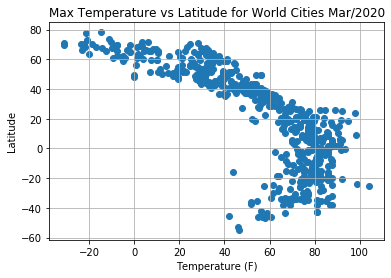

In [9]:
# * Temperature (F) vs. Latitude
plt.scatter(weather_data["MaxTemp"], weather_data["Lat"], marker="o")
# Incorporate the graph properties
plt.title("Max Temperature vs Latitude for World Cities Mar/2020")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("MaxTempVsLatForWorldCities.png")

# Show plot
plt.show()

In [10]:
# The further a world city is located from the equator, as defined by their latitude (both north & south / positive & negative) 
#         their maximum temperature exhibits colder temperatures, and the closer to the equator, the warmer the temperatures.

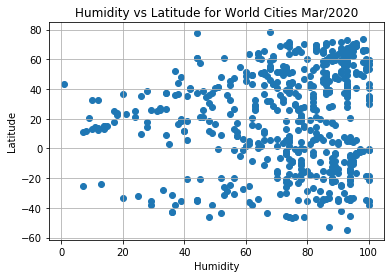

In [11]:
# * Humidity (%) vs. Latitude
plt.scatter(weather_data["Humidity"], weather_data["Lat"], marker="o")
# Incorporate the graph properties
plt.title("Humidity vs Latitude for World Cities Mar/2020")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("HumidityVsLatForWorldCities.png")

# Show plot
plt.show()

In [ ]:
# Humidity has the greatest variance in the Middle latitudes. Humidity at the highest levels 
#           is concentrated from south 40 degrees to north 75 degrees. 

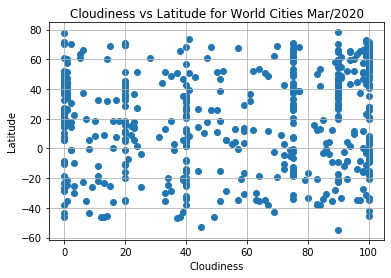

In [12]:
# * Cloudiness (%) vs. Latitude
plt.scatter(weather_data["Cloudiness"], weather_data["Lat"], marker="o")
# Incorporate the graph properties
plt.title("Cloudiness vs Latitude for World Cities Mar/2020")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("CloudinessVsLatForWorldCities.png")

# Show plot
plt.show()

In [ ]:
# The relative cloudiness seems disbursed across the earth.

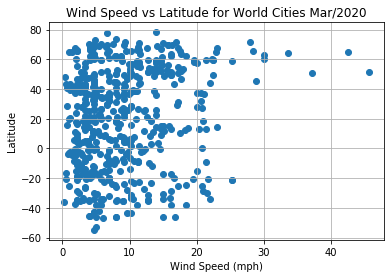

In [13]:
# * Wind Speed (mph) vs. Latitude
plt.scatter(weather_data["WindSpeed"], weather_data["Lat"], marker="o")
# Incorporate the graph properties
plt.title("Wind Speed vs Latitude for World Cities Mar/2020")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("WindSpeedVsLatForWorldCities.png")

# Show plot
plt.show()

In [ ]:
# The greatest wind speed variance occurs in the middle latitudes (25-65mph in the North and 20-45mph in the South) ).

In [ ]:
# Your next objective is to run linear regression on each relationship, only this time separating them into 
#                      Northern Hemisphere (greater than or equal to 0 degrees latitude)        
#                      and Southern Hemisphere (less than 0 degrees latitude):

In [ ]:
# After each pair of plots explain what the linear regression is modelling such as any relationships you notice 
#                      and any other analysis you may have.

In [21]:
NorthernWeather_df = weather_data.loc[weather_data['Lat'] >= 0]
SouthernWeather_df = weather_data.loc[weather_data['Lat'] < 0]

In [22]:
#* Northern Hemisphere - Temperature (F) vs. Latitude

# Make the Regression Parameters  -North                                                               x                                 y
(slope, intercept, rvalue, pvalue, stderr) = linregress(NorthernWeather_df['MaxTemp'], NorthernWeather_df['Lat'])
print (f"Slope={slope} Intercept={intercept} Rvalue={rvalue} Pvalue={pvalue} Stderr={stderr}")
# Calculate the Regress Values
regress_NrthTemp = slope * NorthernWeather_df['MaxTemp'] + intercept
# Create the Line Equation
LineEq_NrthTemp = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))

Slope=-0.6352383027752739 Intercept=68.21213404282899 Rvalue=-0.9039536396468217 Pvalue=2.4947061255936603e-146 Stderr=0.01519745202167803


The R-squared value is -0.17.


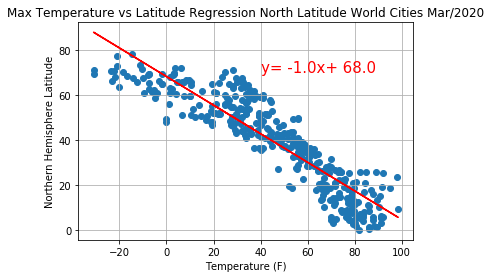

In [67]:
# * Northern Temperature (F) vs. Latitude
plt.scatter(NorthernWeather_df["MaxTemp"], NorthernWeather_df["Lat"], marker="o")
# Plot the Regress Values
plt.plot(NorthernWeather_df['MaxTemp'], regress_NrthTemp, c = "red")
# Annotate the Line Equation
plt.annotate(LineEq_NrthTemp, xy = (40, 70), fontsize = 15, color = "red")
# Create the Labels
# Incorporate the graph properties
plt.title("Max Temperature vs Latitude Regression North Latitude World Cities Mar/2020")
plt.xlabel("Temperature (F)")
plt.ylabel("Northern Hemisphere Latitude")
plt.grid(True)
# Display the R squared Value
print(f"The R-squared value is {round(rvalue,2)}.")
# Save the figure
#plt.savefig("MaxTempVsLatForNorthWorldCities.png")

# Show plot
plt.show()

In [ ]:
#

In [30]:
#* Southern Hemisphere - Temperature (F) vs. Latitude

# Make the Regression Parameters   -South                                                              x                                 y
(slope, intercept, rvalue, pvalue, stderr) = linregress(SouthernWeather_df['MaxTemp'], SouthernWeather_df['Lat'])
print (f"Slope={slope} Intercept={intercept} Rvalue={rvalue} Pvalue={pvalue} Stderr={stderr}")
# Calculate the Regress Values
regress_SothTemp = slope * SouthernWeather_df['MaxTemp'] + intercept
# Create the Line Equation
LineEq_SothTemp = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))

Slope=0.6311268462482669 Intercept=-68.330072861062 Rvalue=0.48204432357729826 Pvalue=2.1531950715074346e-11 Stderr=0.08797962671989798


The R-squared value is -0.17.


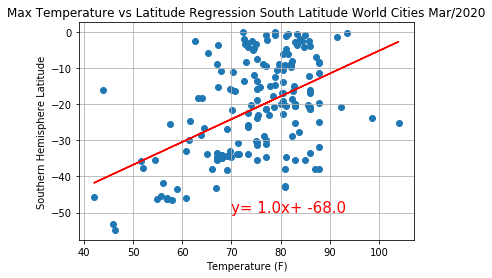

In [66]:
# * Southern Temperature (F) vs. Latitude
plt.scatter(SouthernWeather_df["MaxTemp"], SouthernWeather_df["Lat"], marker="o")
# Plot the Regress Values
plt.plot(SouthernWeather_df['MaxTemp'], regress_SothTemp, c = "red")
# Annotate the Line Equation
plt.annotate(LineEq_SothTemp, xy = (70, -50), fontsize = 15, color = "red")
# Create the Labels
# Incorporate the graph properties
plt.title("Max Temperature vs Latitude Regression South Latitude World Cities Mar/2020")
plt.xlabel("Temperature (F)")
plt.ylabel("Southern Hemisphere Latitude")
plt.grid(True)
# Display the R squared Value
print(f"The R-squared value is {round(rvalue,2)}.")
# Save the figure
#plt.savefig("MaxTempVsLatForSouthWorldCities.png")

# Show plot
plt.show()

In [33]:
#* Northern Hemisphere - Humidity (%) vs. Latitude
# Make the Regression Parameters  -North                                                               x                                 y
(slope, intercept, rvalue, pvalue, stderr) = linregress(NorthernWeather_df['Humidity'], NorthernWeather_df['Lat'])
print (f"Slope={slope} Intercept={intercept} Rvalue={rvalue} Pvalue={pvalue} Stderr={stderr}")
# Calculate the Regress Values
regress_NrthHum = slope * NorthernWeather_df['Humidity'] + intercept
# Create the Line Equation
LineEq_NrthHum = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))

Slope=0.3370804835388068 Intercept=14.595995080021456 Rvalue=0.379640219152968 Pvalue=6.3962112814925394e-15 Stderr=0.041541077222622784


The R-squared value is -0.17.


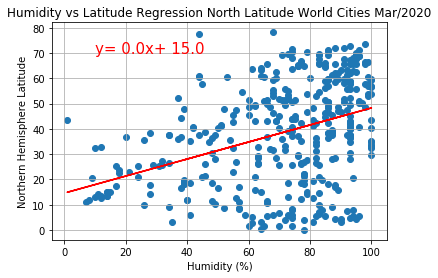

In [65]:
# * Northern Humidity (%) vs. Latitude
plt.scatter(NorthernWeather_df["Humidity"], NorthernWeather_df["Lat"], marker="o")
# Plot the Regress Values
plt.plot(NorthernWeather_df['Humidity'], regress_NrthHum, c = "red")
# Annotate the Line Equation
plt.annotate(LineEq_NrthHum, xy = (10, 70), fontsize = 15, color = "red")
# Create the Labels
# Incorporate the graph properties
plt.title("Humidity vs Latitude Regression North Latitude World Cities Mar/2020")
plt.xlabel("Humidity (%)")
plt.ylabel("Northern Hemisphere Latitude")
plt.grid(True)
# Display the R squared Value
print(f"The R-squared value is {round(rvalue,2)}.")
# Save the figure
#plt.savefig("MaxTempVsLatForNorthWorldCities.png")

# Show plot
plt.show()

In [35]:
#* Southern Hemisphere - Humidity (%) vs. Latitude
# Make the Regression Parameters   -South                                                              x                                 y
(slope, intercept, rvalue, pvalue, stderr) = linregress(SouthernWeather_df['Humidity'], SouthernWeather_df['Lat'])
print (f"Slope={slope} Intercept={intercept} Rvalue={rvalue} Pvalue={pvalue} Stderr={stderr}")
# Calculate the Regress Values
regress_SothHum = slope * SouthernWeather_df['Humidity'] + intercept
# Create the Line Equation
LineEq_SothHum = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))

Slope=0.19284708592974592 Intercept=-35.75053135741664 Rvalue=0.2760107883944695 Pvalue=0.00024743087474793444 Stderr=0.05150575799112819


The R-squared value is -0.17.


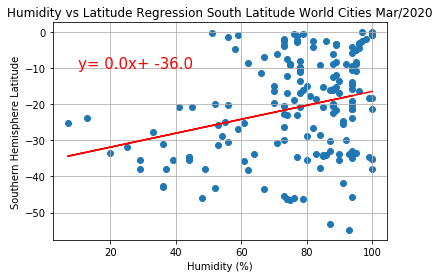

In [64]:
# * Southern Humidity (%) vs. Latitude
plt.scatter(SouthernWeather_df["Humidity"], SouthernWeather_df["Lat"], marker="o")
# Plot the Regress Values
plt.plot(SouthernWeather_df['Humidity'], regress_SothHum, c = "red")
# Annotate the Line Equation
plt.annotate(LineEq_SothHum, xy = (10, -10), fontsize = 15, color = "red")
# Create the Labels
# Incorporate the graph properties
plt.title("Humidity vs Latitude Regression South Latitude World Cities Mar/2020")
plt.xlabel("Humidity (%)")
plt.ylabel("Southern Hemisphere Latitude")
plt.grid(True)
# Display the R squared Value
print(f"The R-squared value is {round(rvalue,2)}.")
# Save the figure
#plt.savefig("HumidityVsLatForSouthWorldCities.png")

# Show plot
plt.show()

In [40]:
#* Northern Hemisphere - Cloudiness (%) vs. Latitude
# Make the Regression Parameters  -North                                                               x                                 y
(slope, intercept, rvalue, pvalue, stderr) = linregress(NorthernWeather_df['Cloudiness'], NorthernWeather_df['Lat'])
print (f"Slope={slope} Intercept={intercept} Rvalue={rvalue} Pvalue={pvalue} Stderr={stderr}")
# Calculate the Regress Values
regress_NrthCloud = slope * NorthernWeather_df['Cloudiness'] + intercept
# Create the Line Equation
LineEq_NrthCloud = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))

Slope=0.16755348500806422 Intercept=29.633007698162004 Rvalue=0.3103516913237749 Pvalue=3.198490063907496e-10 Stderr=0.025954863227418423


The R-squared value is -0.17.


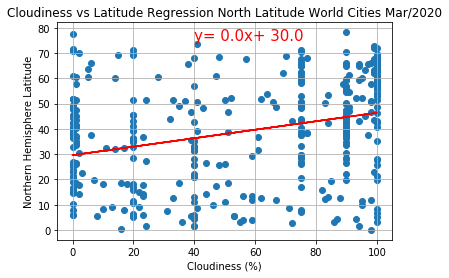

In [63]:
# * Northern Cloudiness (%) vs. Latitude
plt.scatter(NorthernWeather_df["Cloudiness"], NorthernWeather_df["Lat"], marker="o")
# Plot the Regress Values
plt.plot(NorthernWeather_df['Cloudiness'], regress_NrthCloud, c = "red")
# Annotate the Line Equation
plt.annotate(LineEq_NrthCloud, xy = (40, 75), fontsize = 15, color = "red")
# Create the Labels
# Incorporate the graph properties
plt.title("Cloudiness vs Latitude Regression North Latitude World Cities Mar/2020")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Northern Hemisphere Latitude")
plt.grid(True)
# Display the R squared Value
print(f"The R-squared value is {round(rvalue,2)}.")
# Save the figure
#plt.savefig("MaxTempVsLatForNorthWorldCities.png")

# Show plot
plt.show()

In [47]:
#* Southern Hemisphere - Cloudiness (%) vs. Latitude
# Make the Regression Parameters   -South                                                              x                                 y
(slope, intercept, rvalue, pvalue, stderr) = linregress(SouthernWeather_df['Cloudiness'], SouthernWeather_df['Lat'])
print (f"Slope={slope} Intercept={intercept} Rvalue={rvalue} Pvalue={pvalue} Stderr={stderr}")
# Calculate the Regress Values
regress_SothCloud = slope * SouthernWeather_df['Cloudiness'] + intercept
# Create the Line Equation
LineEq_SothCloud = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))

Slope=0.07877441173858293 Intercept=-25.513475547387287 Rvalue=0.20310210928835473 Pvalue=0.0075367920781606885 Stderr=0.02912720799112459


The R-squared value is -0.17.


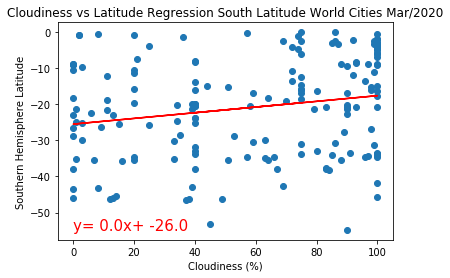

In [62]:
# * Southern Cloudiness (%) vs. Latitude
plt.scatter(SouthernWeather_df["Cloudiness"], SouthernWeather_df["Lat"], marker="o")
# Plot the Regress Values
plt.plot(SouthernWeather_df['Cloudiness'], regress_SothCloud, c = "red")
# Annotate the Line Equation
plt.annotate(LineEq_SothCloud, xy = (0, -55), fontsize = 15, color = "red")
# Create the Labels
# Incorporate the graph properties
plt.title("Cloudiness vs Latitude Regression South Latitude World Cities Mar/2020")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Southern Hemisphere Latitude")
# Display the R squared Value
print(f"The R-squared value is {round(rvalue,2)}.")
# Save the figure
#plt.savefig("MaxTempVsLatForSouthWorldCities.png")

# Show plot
plt.show()

In [52]:
#* Northern Hemisphere - Wind Speed (mph) vs. Latitude
# Make the Regression Parameters  -North                                                               x                                 y
(slope, intercept, rvalue, pvalue, stderr) = linregress(NorthernWeather_df['WindSpeed'], NorthernWeather_df['Lat'])
print (f"Slope={slope} Intercept={intercept} Rvalue={rvalue} Pvalue={pvalue} Stderr={stderr}")
# Calculate the Regress Values
regress_NrthWind = slope * NorthernWeather_df['WindSpeed'] + intercept
# Create the Line Equation
LineEq_NrthWind = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))

Slope=0.6091755167975883 Intercept=33.09589932672591 Rvalue=0.20065015487517857 Pvalue=6.178800083456362e-05 Stderr=0.15041503552418492


The R-squared value is -0.17.


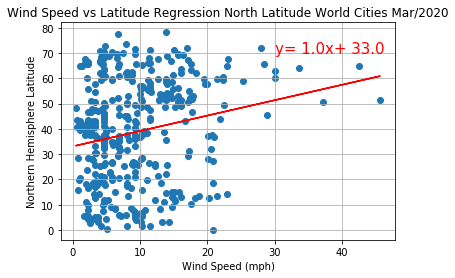

In [61]:
# * Northern Wind Speed (mph)) vs. Latitude
plt.scatter(NorthernWeather_df["WindSpeed"], NorthernWeather_df["Lat"], marker="o")
# Plot the Regress Values
plt.plot(NorthernWeather_df['WindSpeed'], regress_NrthWind, c = "red")
# Annotate the Line Equation
plt.annotate(LineEq_NrthWind, xy = (30, 70), fontsize = 15, color = "red")
# Create the Labels
# Incorporate the graph properties
plt.title("Wind Speed vs Latitude Regression North Latitude World Cities Mar/2020")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Northern Hemisphere Latitude")
plt.grid(True)
# Display the R squared Value
print(f"The R-squared value is {round(rvalue,2)}.")
# Save the figure
#plt.savefig("WindSpeedVsLatForNorthWorldCities.png")

# Show plot
plt.show()

In [55]:
#* Southern Hemisphere - Wind Speed (mph) vs. Latitude
# Make the Regression Parameters   -South                                                              x                                 y
(slope, intercept, rvalue, pvalue, stderr) = linregress(SouthernWeather_df['WindSpeed'], SouthernWeather_df['Lat'])
print (f"Slope={slope} Intercept={intercept} Rvalue={rvalue} Pvalue={pvalue} Stderr={stderr}")
# Calculate the Regress Values
regress_SothWind = slope * SouthernWeather_df['WindSpeed'] + intercept
# Create the Line Equation
LineEq_SothWind = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))

Slope=-0.4115032370801793 Intercept=-17.743088292524536 Rvalue=-0.16587324165375492 Pvalue=0.029657721891930576 Stderr=0.18763513202914267


The R-squared value is -0.17.


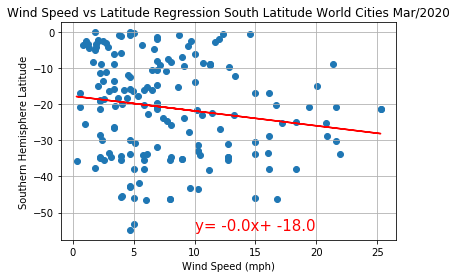

In [60]:
# * Southern Wind Speed (mph) vs. Latitude
plt.scatter(SouthernWeather_df["WindSpeed"], SouthernWeather_df["Lat"], marker="o")
# Plot the Regress Values
plt.plot(SouthernWeather_df['WindSpeed'], regress_SothWind, c = "red")
# Annotate the Line Equation
plt.annotate(LineEq_SothWind, xy = (10, -55), fontsize = 15, color = "red")
# Create the Labels
# Incorporate the graph properties
plt.title("Wind Speed vs Latitude Regression South Latitude World Cities Mar/2020")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Southern Hemisphere Latitude")
plt.grid(True)
# Display the R squared Value
print(f"The R-squared value is {round(rvalue,2)}.")
# Save the figure
#plt.savefig("WindSpeedVsLatForSouthWorldCities.png")

# Show plot
plt.show()